## Notebook to reproduce the convolution analysis for the non-radiative coolign simulations Section 5.1 of the paper

In [1]:
from jetset.jet_timedep import JetTimeEvol
temp_ev_acc_flare=JetTimeEvol.load_model('temp_ev_sim_flare/temp_ev_acc_flare.pkl')
R0=temp_ev_acc_flare.rad_region.jet.parameters.R.val
delta=temp_ev_acc_flare.rad_region.jet.parameters.beam_obj.val

temp_ev_exp=JetTimeEvol.load_model('temp_ev_sim_exp_change_beta_no_synch_cooling/temp_ev_expansion_beta_exp=0.001.pkl')
t_exp=temp_ev_exp.parameters.t_jet_exp.val




------ ExpTrise


/Users/orion/anaconda3/envs/jetset/lib/python3.8/site-packages/jetset/model_manager.py:147: UserWarning: no cosmology defined, using default FlatLambdaCDM(name="Planck13", H0=67.8 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0483)
  warnings.warn('no cosmology defined, using default %s'%self.cosmo)


model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
ExpTrise,R0,1.914523e+14,1.914523e+14,5.479742e+13,--,1.666667e+14,1.666667e+13,1.666667e+15,False
ExpTrise,nu_0,1.148886e+11,1.148886e+11,3.936855e+10,--,9.000000e+10,5.000000e+10,5.000000e+11,False
ExpTrise,nu_1,1.500000e+10,--,--,--,1.500000e+10,1.000000e+06,1.000000e+15,True
ExpTrise,phi,5.694506e-01,5.694506e-01,9.680939e-02,--,5.000000e-01,-2.000000e+00,2.000000e+00,False


R0 fit 1.914523e+14
R0 fit *delta 5.743569e+15
p fit= 1.66+/-0.33
------ Decay


/Users/orion/anaconda3/envs/jetset/lib/python3.8/site-packages/jetset/model_manager.py:147: UserWarning: no cosmology defined, using default FlatLambdaCDM(name="Planck13", H0=67.8 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0483)
  warnings.warn('no cosmology defined, using default %s'%self.cosmo)


model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
ExpTdec_vexp,R0,1.725906e+14,1.725906e+14,1.333282e+13,--,1.666667e+14,1.666667e+13,1.666667e+15,False
ExpTdec_vexp,m_B,8.620062e-01,8.620062e-01,6.643047e-02,--,1.000000e+00,5.000000e-01,2.500000e+00,False
ExpTdec_vexp,nu_0,1.137509e+11,1.137509e+11,1.556283e+10,--,9.000000e+10,5.000000e+10,5.000000e+11,False
ExpTdec_vexp,nu_1,1.500000e+10,--,--,--,1.500000e+10,1.000000e+06,1.000000e+15,True
ExpTdec_vexp,phi,5.640220e-01,5.640220e-01,3.815246e-02,--,5.000000e-01,-2.000000e+00,2.000000e+00,False


R_0 5.000000e+15
R0_fit 1.725906e+14
R0_fit*delta 5.177718e+15
p fit= 1.56+/-0.13
------ ExpDeltaT_vexp


/Users/orion/anaconda3/envs/jetset/lib/python3.8/site-packages/jetset/model_manager.py:147: UserWarning: no cosmology defined, using default FlatLambdaCDM(name="Planck13", H0=67.8 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0483)
  warnings.warn('no cosmology defined, using default %s'%self.cosmo)


model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
DeltaT,t_exp,0.000000e+00,0.000000e+00,1.000000e-01,--,0.000000e+00,0.000000e+00,0.000000e+00,False
DeltaT,R0,1.850866e+14,1.850866e+14,8.182525e+12,--,1.666667e+14,1.666667e+13,1.666667e+15,False
DeltaT,nu_0,1.050746e+11,1.050746e+11,5.596871e+09,--,9.000000e+10,5.000000e+10,5.000000e+11,False
DeltaT,nu_1,1.500000e+10,--,--,--,1.500000e+10,1.000000e+06,1.000000e+15,True
DeltaT,phi,5.418670e-01,5.418670e-01,1.483573e-02,--,5.000000e-01,-2.000000e+00,2.000000e+00,False


R_0 5.000000e+15
R0_fit1.850866e+14
R0_fit*delta 5.552598e+15
t_exp 0.000000e+00
t_exp_sym 0.000000e+00
t_exp_sym/delta 0.000000e+00
p fit= 1.57+/-0.05
------


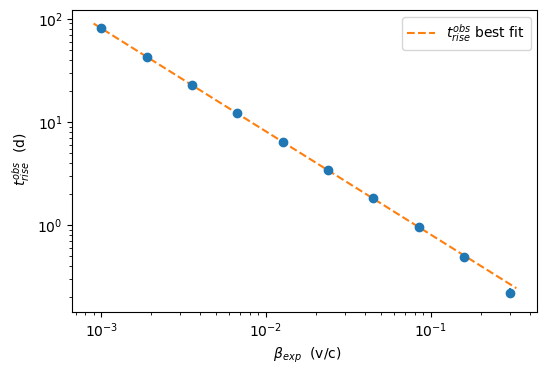

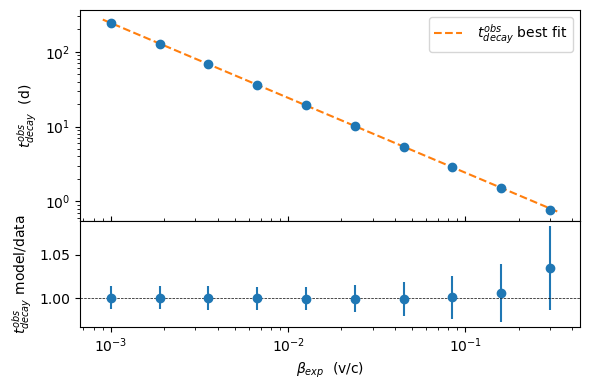

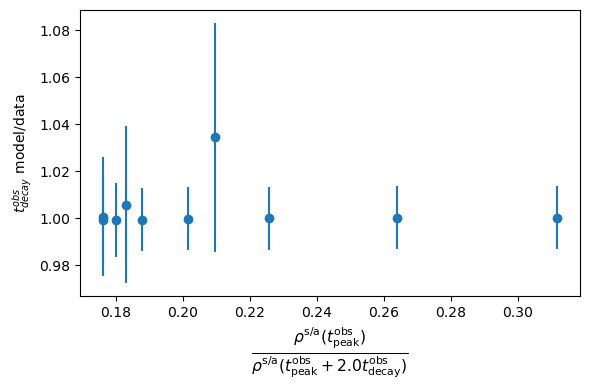

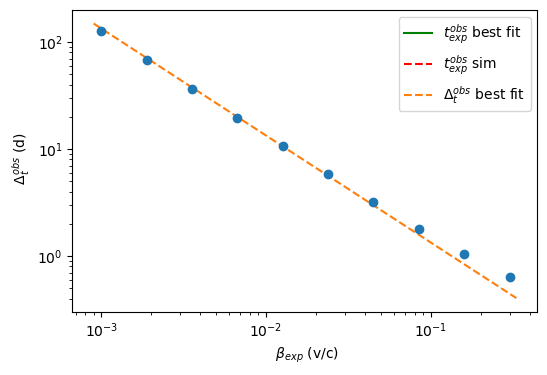

In [2]:
from expansion_tools.delay_analysis import gamma_radio_delay_fit,gamma_radio_delay_analysis_vs_v_exp
from astropy.table import Table
from astropy.units import Unit as u
t=Table.read('temp_ev_analysis_beta_exp_trends_no_synch_cooling/gamma_radio_delay_fit_vs_beta_exp.ecsv')
f_tdec,f_trise,f_delta_t,f_sp,y_dm,y_dm_err,beta_exp=gamma_radio_delay_analysis_vs_v_exp(t['beta_exp'] ,t['t_decay_conv'],t['t_decay_conv_err'],t['t_rise_conv'],t['t_rise_conv_err'] ,t['delta_T_conv'],t['delta_T_conv_err'],0,R0,t_exp,delta,skip_beta_cooling=True)

In [3]:
t = Table([beta_exp*u('c-1'),y_dm,y_dm_err], names=('beta_exp', 't_obs_dacay_data_model','t_obs_dacay_data_model_err'))


t.write('temp_ev_analysis_beta_exp_trends_no_synch_cooling/t_obs_dacay_data_model.ecsv',format='ascii.ecsv')

In [4]:
f_tdec.savefig('temp_ev_analysis_beta_exp_trends_no_synch_cooling/t_dec_v_exp.pdf',bbox_inches = 'tight',
    pad_inches = 0)

f_trise.tight_layout()
f_trise.savefig('temp_ev_analysis_beta_exp_trends_no_synch_cooling/t_rise_v_exp.pdf',bbox_inches = 'tight',
    pad_inches = 0)

f_delta_t.tight_layout()
f_delta_t.savefig('temp_ev_analysis_beta_exp_trends_no_synch_cooling/delta_t_v_exp.pdf',bbox_inches = 'tight',
    pad_inches = 0)

f_sp.tight_layout()
f_sp.savefig('temp_ev_analysis_beta_exp_trends_no_synch_cooling/sp_v_exp.pdf',bbox_inches = 'tight',
    pad_inches = 0)